<a href="https://colab.research.google.com/github/NelisW/colabrepo/blob/master/basics01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!ls "/content/gdrive/My Drive/Colab Notebooks"

basics01.ipynb


In [0]:
# the world's simples TensorFlow app

# this is TensorFlow 1 style

# add two numbers together

import tensorflow as tf

a = tf.Variable(1, name="a")
b = tf.Variable(2, name="b")

f = a + b # f is the relationship graph between a and b

init= tf.global_variables_initializer()
with tf.Session() as s:
  init.run()
  print( f.eval() )
 

Instructions for updating:
Colocations handled automatically by placer.
3


In [0]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

sess = tf.InteractiveSession()

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


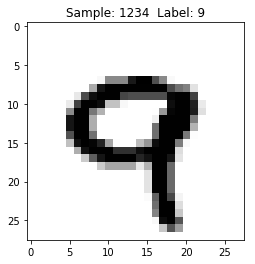

In [0]:
import matplotlib.pyplot as plt

def display_sample(num):
  #print the one-hot array of this smaples label
  print(mnist.train.labels[num])
  # print th label converted back to as a number
  label = mnist.train.labels[num].argmax(axis=0)
  #reshaope the 768 values back to 28x28 image
  image = mnist.train.images[num].reshape([28,28])
  plt.title('Sample: {}  Label: {}'.format(num,label))
  plt.imshow(image,cmap=plt.get_cmap('gray_r'))
  plt.show()
  
display_sample(1234)

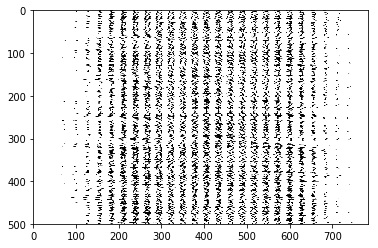

In [0]:
import numpy as np
images = mnist.train.images[0].reshape([1,784])
for i in range(1,500):
  images = np.concatenate((images, mnist.train.images[i].reshape([1,784])))
plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.show()
           

In [0]:
input_images = tf.placeholder(tf.float32,shape=[None, 784])
target_labels = tf.placeholder(tf.float32, shape=[None,10])


In [0]:
hidden_nodes = 512

input_weights = tf.Variable(tf.truncated_normal([784,hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes,10]))
hidden_biases = tf.Variable(tf.zeros([10]))


input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer, hidden_weights) + hidden_biases


In [0]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=digit_weights, labels=target_labels))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)


In [0]:
correct_prediction = tf.equal(tf.argmax(digit_weights,1), tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
tf.global_variables_initializer().run()

In [0]:
for x in range(2000):
  batch = mnist.train.next_batch(100)
  optimizer.run(feed_dict={input_images:batch[0],target_labels:batch[1]})
  if ((x+1)%100 == 0):
    print("Training epoch " + str(x+1))
    print("Acurracy: " +str(accuracy.eval(feed_dict={input_images:mnist.test.images,
                                                    target_labels:mnist.test.labels})))

Training epoch 100
Acurracy: 0.8628
Training epoch 200
Acurracy: 0.8734
Training epoch 300
Acurracy: 0.8776
Training epoch 400
Acurracy: 0.8868
Training epoch 500
Acurracy: 0.8969
Training epoch 600
Acurracy: 0.8966
Training epoch 700
Acurracy: 0.9013
Training epoch 800
Acurracy: 0.908
Training epoch 900
Acurracy: 0.9069
Training epoch 1000
Acurracy: 0.9041
Training epoch 1100
Acurracy: 0.9124
Training epoch 1200
Acurracy: 0.9145
Training epoch 1300
Acurracy: 0.9135
Training epoch 1400
Acurracy: 0.9144
Training epoch 1500
Acurracy: 0.9166
Training epoch 1600
Acurracy: 0.9218
Training epoch 1700
Acurracy: 0.9206
Training epoch 1800
Acurracy: 0.9204
Training epoch 1900
Acurracy: 0.9252
Training epoch 2000
Acurracy: 0.9287


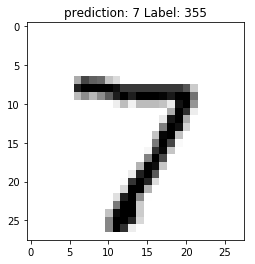

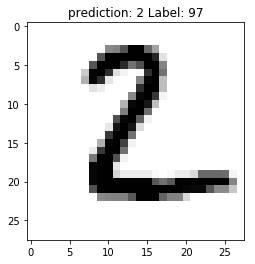

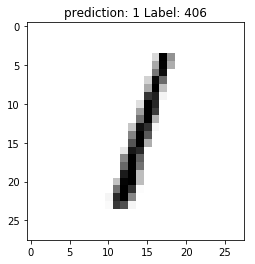

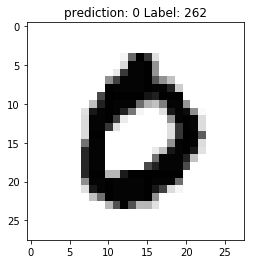

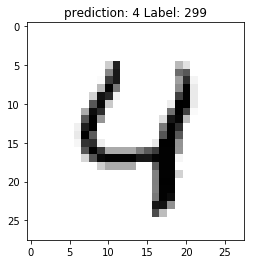

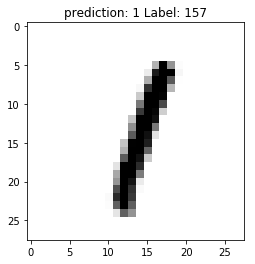

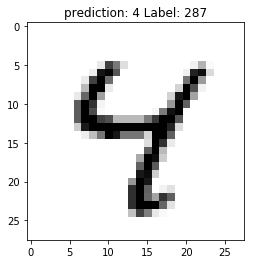

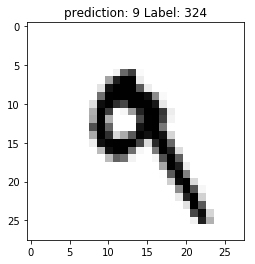

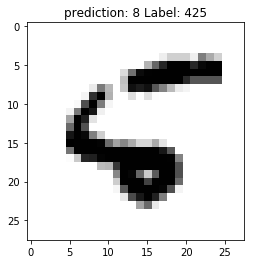

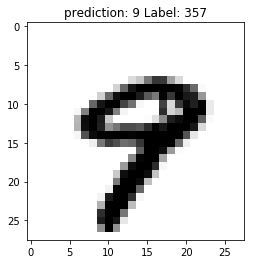

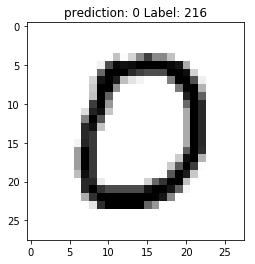

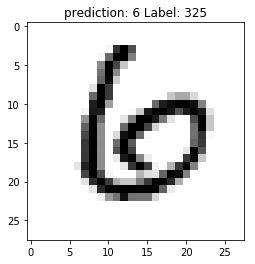

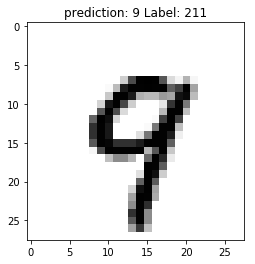

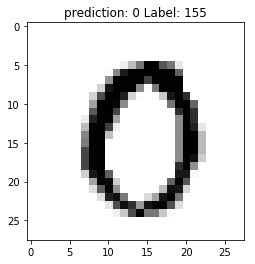

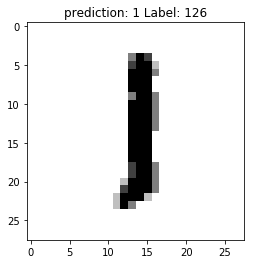

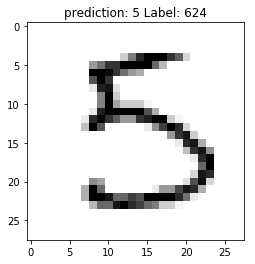

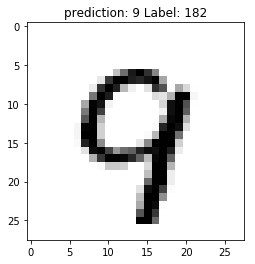

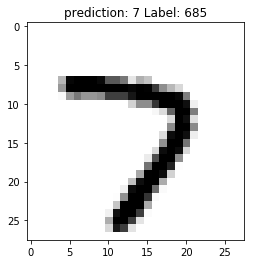

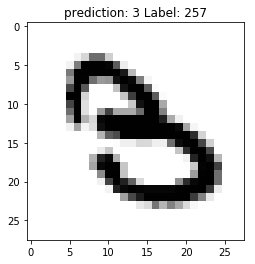

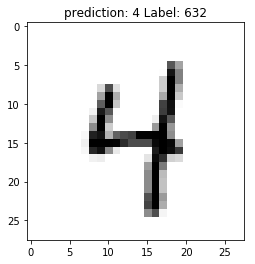

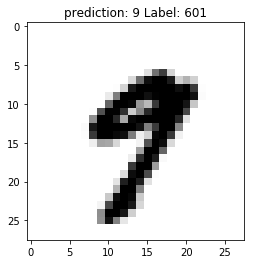

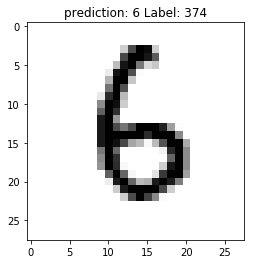

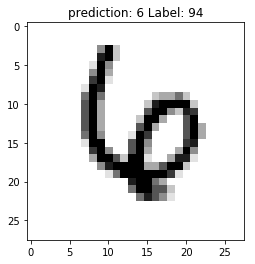

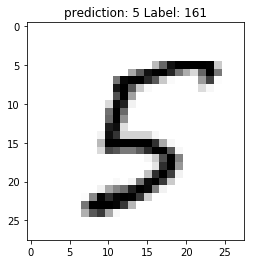

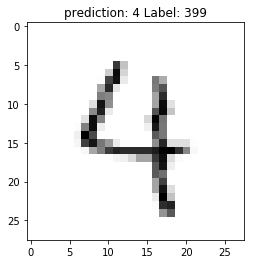

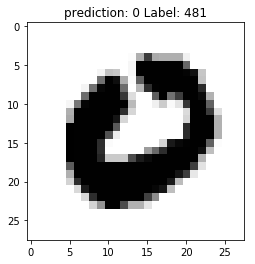

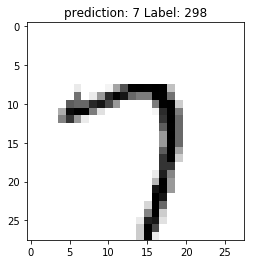

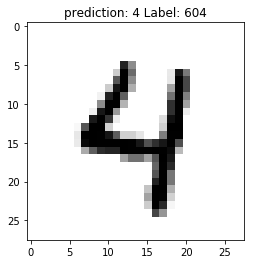

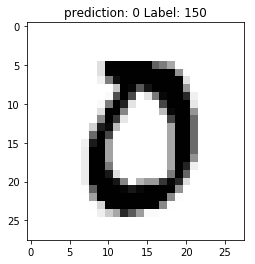

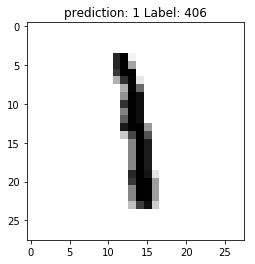

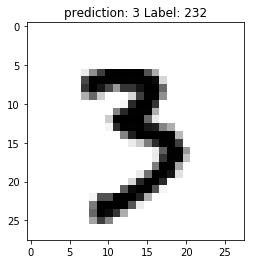

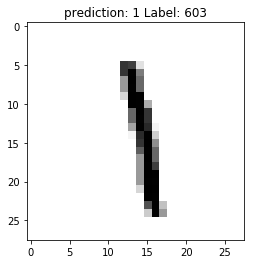

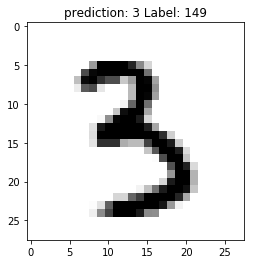

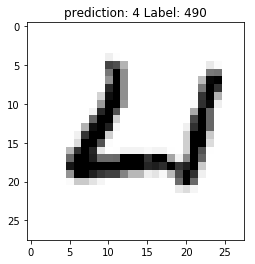

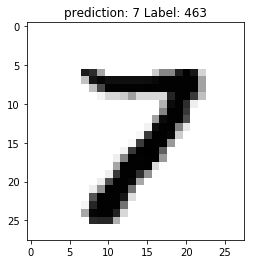

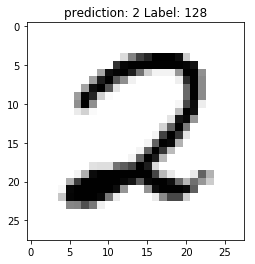

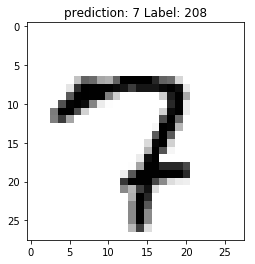

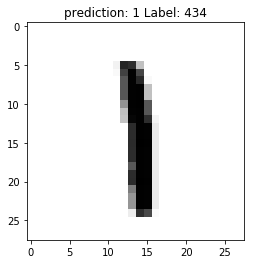

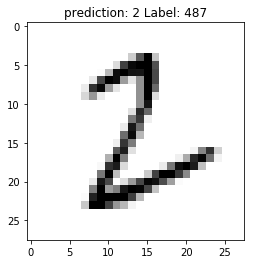

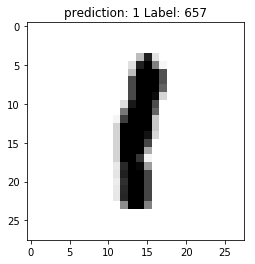

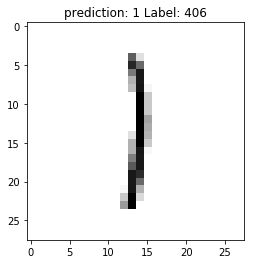

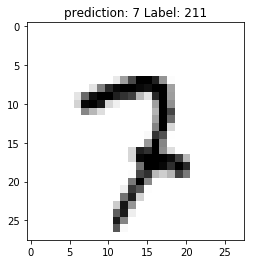

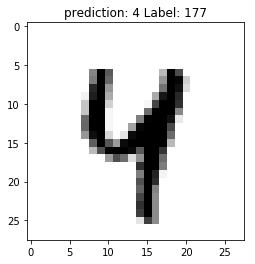

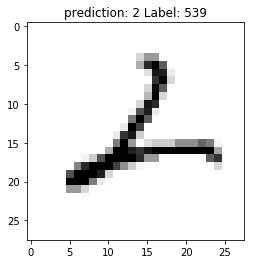

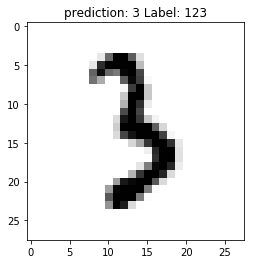

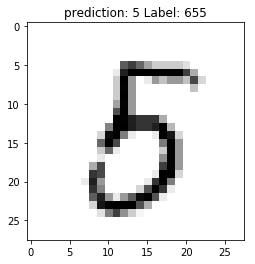

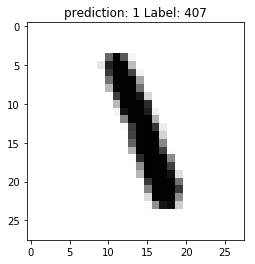

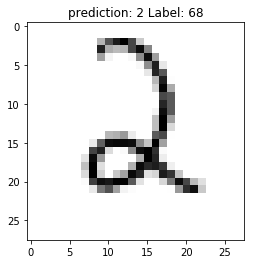

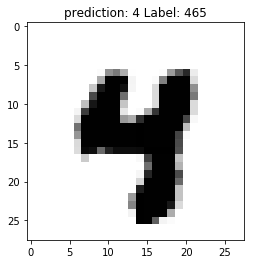

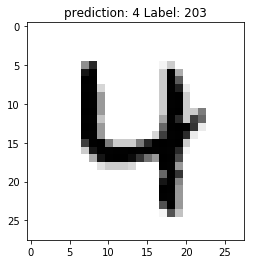

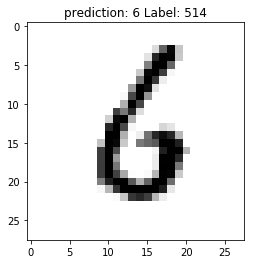

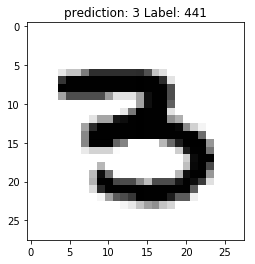

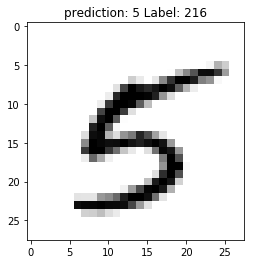

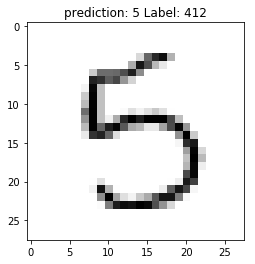

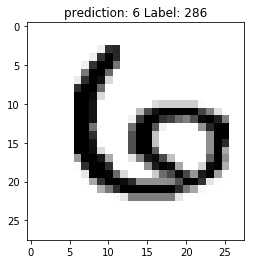

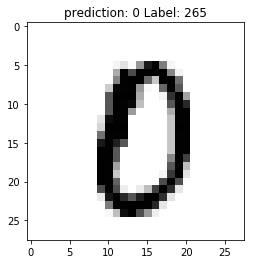

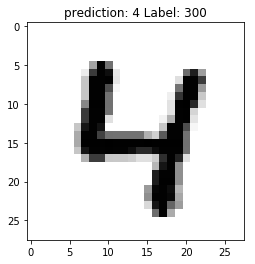

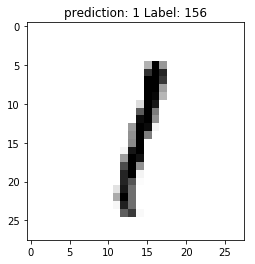

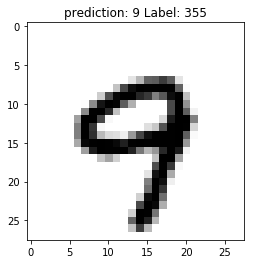

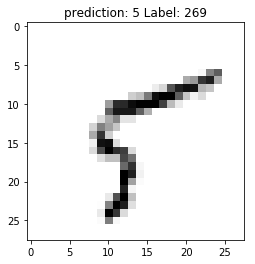

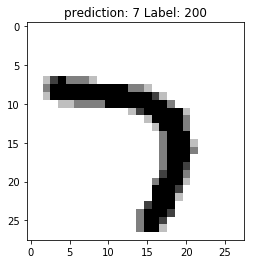

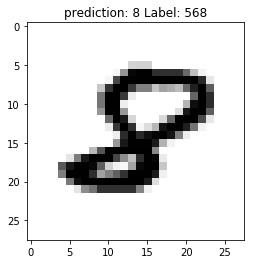

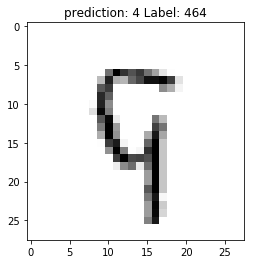

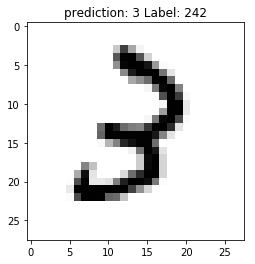

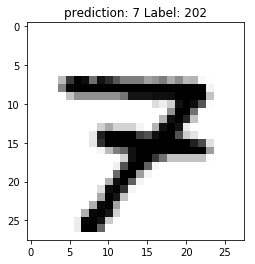

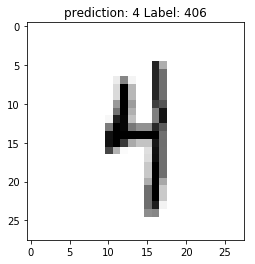

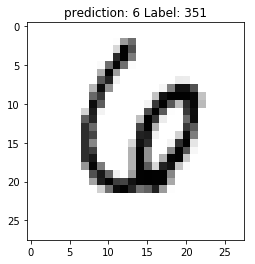

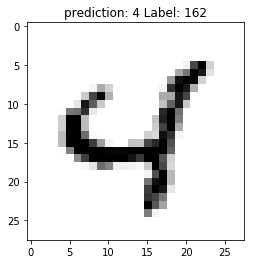

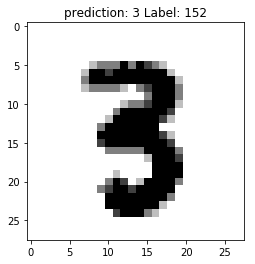

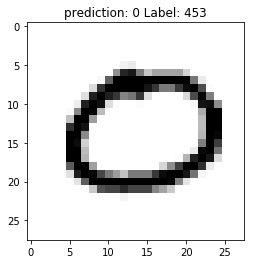

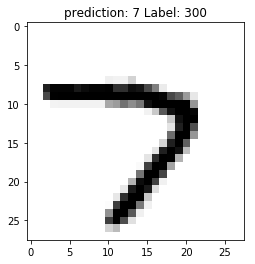

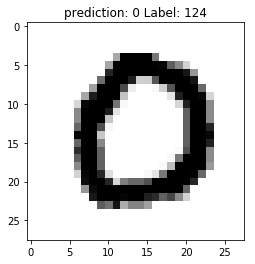

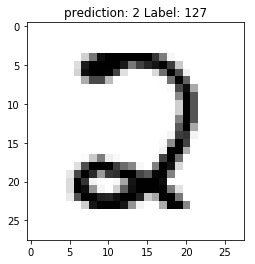

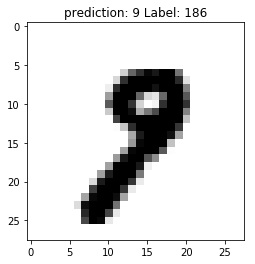

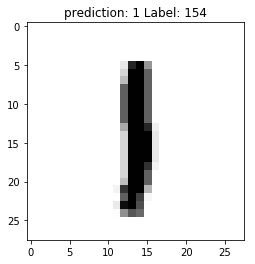

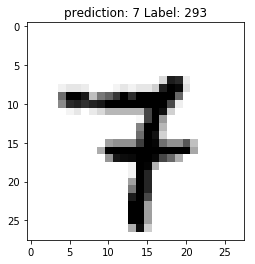

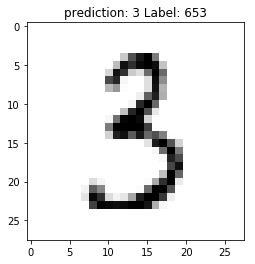

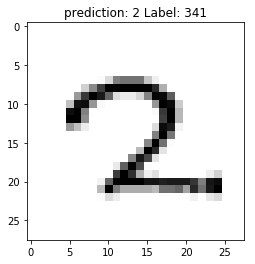

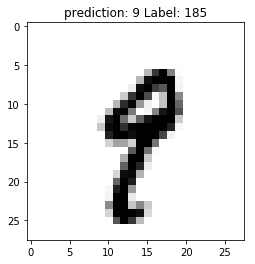

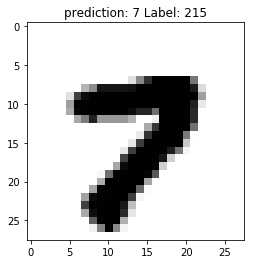

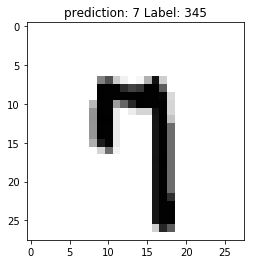

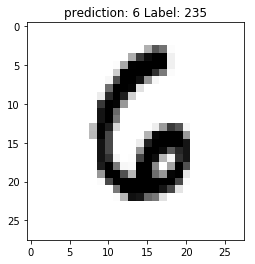

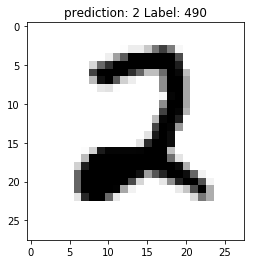

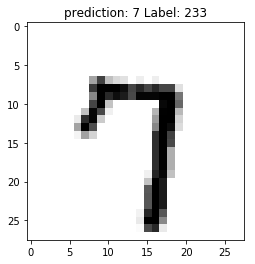

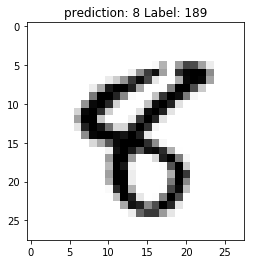

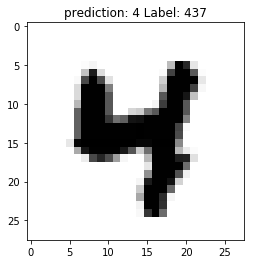

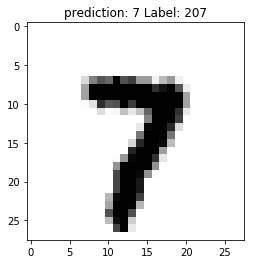

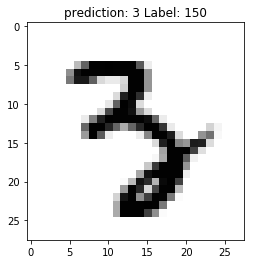

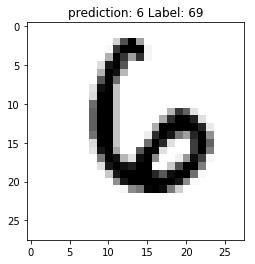

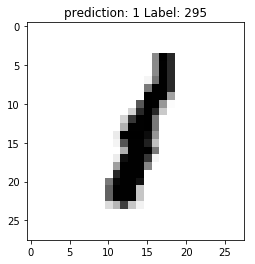

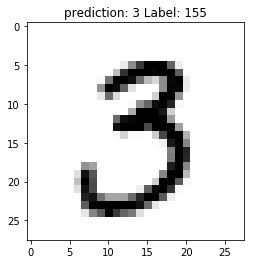

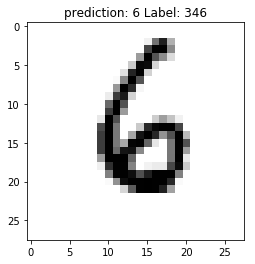

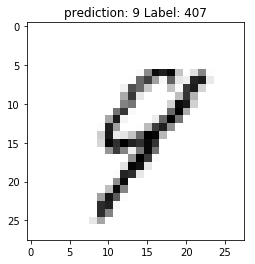

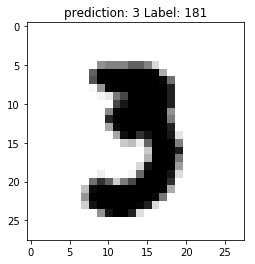

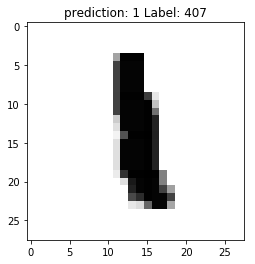

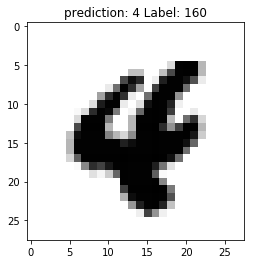

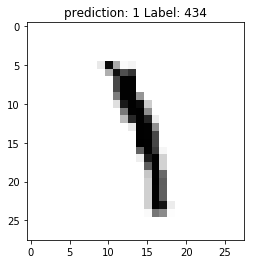

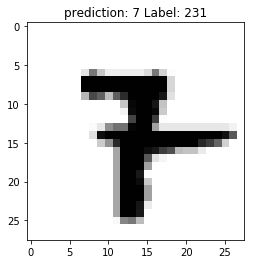

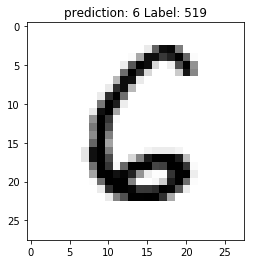

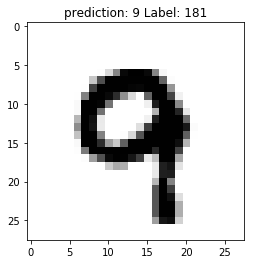

In [0]:
for x in range(100):
  # load single test image and its label
  x_train = mnist.test.images[x,:].reshape(1,784)
  y_train = mnist.test.images[x,:]
  #convert one-hot label to integer
  label = y_train.argmax()
  # get classification 
  prediction = sess.run(digit_weights,feed_dict={input_images:x_train}).argmax()
  if (prediction != label):
    plt.title('prediction: {} Label: {}'.format(prediction, label))
    plt.imshow(x_train.reshape([28,28]),cmap = plt.get_cmap('gray_r'))
    plt.show();